### Importing Libraries

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [ ]:
# Importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

### Train and Validation Path

In [4]:
train_path = '/content/drive/MyDrive/DataSet/Train'
valid_path = '/content/drive/MyDrive/DataSet/Validation'

### Model Formation

In [7]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
print(vgg.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


In [ ]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# Number of classes
folders = glob('/content/drive/MyDrive/DataSet/Train/*')

In [8]:
# Our layers
x = Flatten()(vgg.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 25088), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# View the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Compile defines the loss function, the optimizer and the metrics of the loaded model.
# Config the model with losses and metrics.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DataSet/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1800 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DataSet/Validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 539 images belonging to 6 classes.


### Training the Model

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
57/57 [==============================] - 498s 8s/step - loss: 1.2163 - accuracy: 0.5555 - val_loss: 0.7629 - val_accuracy: 0.7477
Epoch 2/50
57/57 [==============================] - 35s 621ms/step - loss: 0.4500 - accuracy: 0.8482 - val_loss: 0.6530 - val_accuracy: 0.7532
Epoch 3/50
57/57 [==============================] - 35s 619ms/step - loss: 0.3973 - accuracy: 0.8649 - val_loss: 1.0168 - val_accuracy: 0.6994
Epoch 4/50
57/57 [==============================] - 35s 621ms/step - loss: 0.3365 - accuracy: 0.8767 - val_loss: 0.5532 - val_accuracy: 0.8163
Epoch 5/50
57/57 [==============================] - 35s 625ms/step - loss: 0.2468 - accuracy: 0.9203 - val_loss: 0.6347 - val_accuracy: 0.7978
Epoch 6/50
57/57 [==============================] - 35s 623ms/step - loss: 0.2036 - accuracy: 0.9366 - val_loss: 0.5582 - val_accuracy: 0.8071
Epoch 7/50
57/57 [==============================] - 35s 621ms/step - loss: 0.1864 - accuracy: 0.9430 - val_loss: 0.6572 - val_accuracy: 0.7941
E

### Evaluation

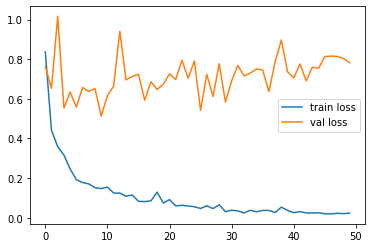

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

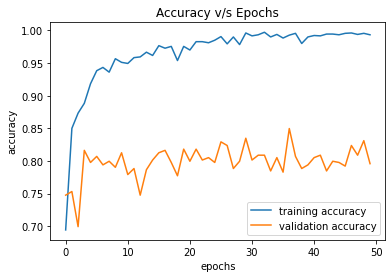

<Figure size 432x288 with 0 Axes>

In [ ]:

plt.figure(0)
plt.plot(r.history['accuracy'], label = 'training accuracy')
plt.plot(r.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy')